In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

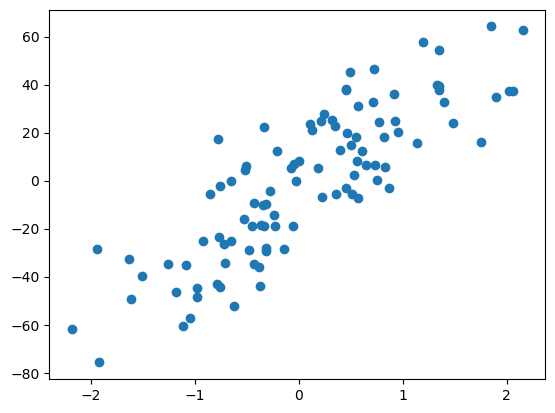

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [8]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

Mathematically,

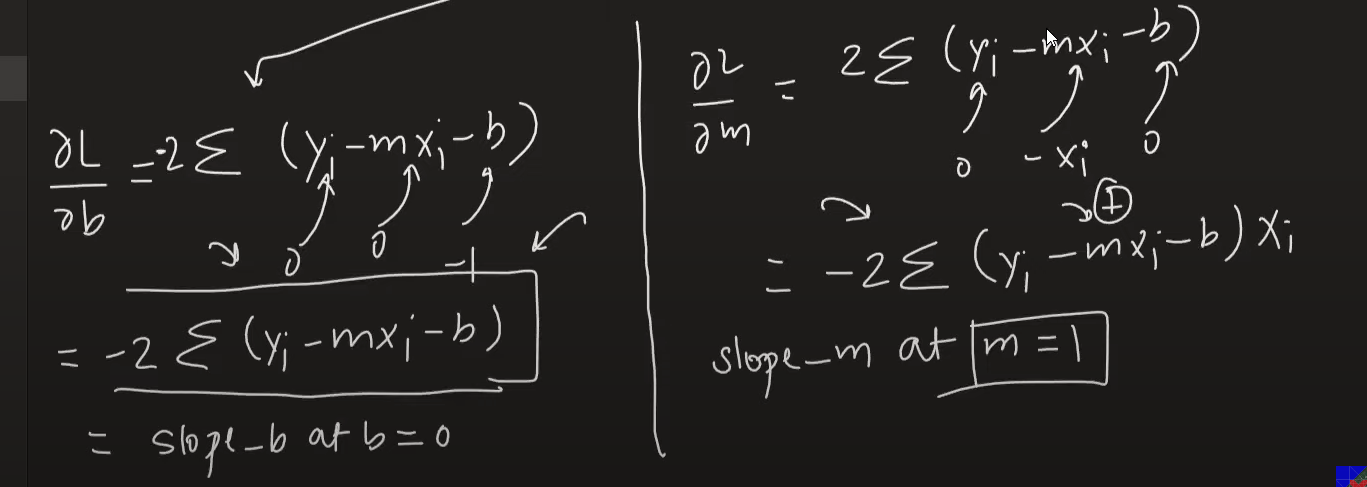

In [9]:
# Self-created Gradient Descent
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        # initializing slope and intercept with random values 
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the gradient w.r.t model parameters.
        # loss slope means gradient here.
        for i in range(self.epochs):
            # loss slope w.r.t b, ∇L/∇b = -2 Σ(y - mx -b)
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            # loss slope w.r.t m, ∇L/∇m = -2 Σ(y - mx -b)*x
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            # Bnew = Bold - lr*loss_slope
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [10]:
gd = GDRegressor(0.001,50)

In [11]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [12]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579